<div class="alert alert-block" style="color: green">
    <h1><center> DAKD 2025 EXERCISE 2: SUPERVISED LEARNING  </center></h1>

### Fill in your name, student id number and email address
#### name: Saaga Kovapohja
#### student id: 2508482
#### email: saskov@utu.fi




<i>Machine learning</i> is a subfield of artificial intelligence that provides automatic, objective and data-driven techniques for modeling the data. Its two main branches are <i>supervised learning</i> and <i>unsupervised learning</i>, and in this exercise, we are going to use the former, <font color = green>supervised learning</font>, for classification and regression tasks.

For classification, we will use the Cardio data that was mostly cleaned up. Some data pre-processing steps are still required to ensure that it's in an appropriate format so that models can learn from it. Even though we are not conducting any major data exploration nor data preparation this time, <i>you should never forget it in your future data analyses</i>.

-----

#### General Guidance for Exercises

- <b>Complete all tasks:</b> Make sure to answer all questions, even if you cannot get your script to fully work.
- <b>Code clarity:</b> Write clear and readable code. Include comments to explain what your code does.
- <b>Effective visualizations:</b> Ensure all plots have labeled axes, legends, and captions. Your visualizations should clearly represent the underlying data.
- <b>Notebook organization:</b> You can add more code or markdown cells to improve the structure of your notebook as long as it maintains a logical flow.
- <b>Submission:</b> Submit both the .ipynb and .html or .pdf versions of your notebook. Before finalizing your notebook, use the "Restart & Run All" feature to ensure it runs correctly.
- <b>Quiz:</b> After completing the notebook, you should complete the second exercise quiz in Moodle. Please do not attempt it before doing the notebook, as the questions directly relate to the results you will obtain from it.
- <b>Grading criteria:</b>
    - The grading scale is *Fail*/*Pass*/*Pass with honors* (+1).
    - To pass, you must complete the required parts and score at least 80% on the quiz. Please note that notebooks may also be checked. 
    - To achieve Pass with honors, also complete the bonus exercises.
- <b>Technical issues:</b>
    - If you encounter problems, start with an online search to find solutions but do not simply copy and paste code. Understand any code you use and integrate it appropriately.
    - Cite all external sources used, whether for code or explanations.
    - If problems persist, ask for help in the course discussion forum, at exercise sessions, or via email at ankazl@utu.fi, zoher.orabe@utu.fi.
- <b>Use of AI and large language models:</b>
    - We do not encourage the use of AI tools like ChatGPT. If you use them, critically evaluate their outputs.
    - Describe how you used the AI tools in your work, including your input and how the output was beneficial.
- <b>Time management:</b> Do not leave your work until the last moment. No feedback will be available during weekends.
- <b>Additional notes:</b>
    - You can find the specific deadlines and session times for each assignment on the Moodle course page.
    - Ensure all your answers are concise—typically a few sentences per question.
    - Your .ipynb notebook is expected to be run to completion, which means that it should execute without errors when all cells are run in sequence.
 are run in sequence.


<font color = green> The guided exercise session is held on the 3th of December at 14:15-16:00, at lecture hall X, Natura building.</font>

<font color = red size = 4>The deadline is the 8th of December at 23:55</font>. Late submissions will not be accepted unless there is a valid excuse for an extension which should be asked **before** the original deadline.


------

### <font color = red> Packages needed for this exercise: </font>

You can use other packages as well, but this excercise can be completed with those below.


In [79]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold # Added for cross-validation in Ridge Regression

# Show the plots inline in the notebook
%matplotlib inline

import numpy as np
import random

# Visualization packages - matplotlib and seaborn
# Remember that pandas is also handy and capable when it comes to plotting!
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold # Added for cross-validation in Ridge Regression


# ------------------------------------
# This is NOT necessary, but can be used for better readability of prints

class color:
   GREEN = '\033[92m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   # Ends the styling
   END = '\033[0m'
    
# And to use this, simply just create it and call the variable you need as
print(color.UNDERLINE + 'This' + color.END,
      color.GREEN + 'is',
      color.RED + 'just',
      color.GREEN + 'an',
      color.BOLD + 'example' + color.END,
      color.RED + ':)'
)


# 2️⃣ Load data
cancerData = pd.read_csv('prostate.csv')  # assuming tab-separated


This is just an example :)


### <font color = red> Data needed for this exercise: </font>

You can download the two datasets (Cardio and Prostate) required to complete the notebook from Moodle under the Exercise II section.

### <font color = red> Reproducibility </font>

Before the exercise itself, we might as well discuss about the reproducibility of experiments we conduct in research. It can be quite a nightmare for some if code spewed out only random results. 
To address this, we can set a **random seed** to ensure that any random processes, such as splitting our dataset into training and test sets, yield consistent results across multiple runs. By using a fixed random seed, we enhance the reproducibility of our experiments, making it easier to validate findings. 
We will use the random seed <font color = red>2025</font>. For stable results and to obtain the correct quiz answers, please <font color = red> do not </font> use any other random seed anywhere in your code.


In [80]:
np.random.seed(2025)
random.seed(2025)

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using the <font color = lightcoral>K-Nearest Neightbors (k-NN) algorithm</font>. The k-NN algorithm is a classic supervised machine learning technique based on the assumption that data points with similar features tend to belong to the same class, and thus are likely to be near each other in feature space.

In our case, we'll use the k-NN algorithm to *predict the presence of cardiovascular disease* (CVD) using all the other variables as <font color = lightcoral>features</font> in the given data set. I.e. the <font color = lightcoral>target variable</font> that we are interested in is `cardio`. Let's have a brief look at the features again:

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in years 
| sex | binary | Female == 0, Male == 1
| height | numeric | Measured weight of the patient (kg)
| weight | numeric | Measured weight of the patient (cm)
| ap_hi | numeric | Measured Systolic blood pressure
| ap_lo | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| alco | binary | A subjective feature based on asking the patient whether or not he/she consumes alcohol
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| cholesterol | categorical | Cholesterol associated risk information evaluated by a doctor
| gluc | categorical | Glucose associated risk information evaluated by a doctor

But first, we need data for the task. The code for loading the data into the environment is provided for you. The code should work but make sure that you have the CSV file of the data in the same directory where you have this notebook file.

**Exercise 1 A)**

Before starting with the algorithm, perform some data exploration and determine the following characteristics of the data:

(1) What is the total number of data samples?

(2) How many distinct classes (target categories) does the dataset contain?

(3) Which person (their index) is the heaviest in the dataset?

(4) Which feature in the dataset has the largest range (max–min)?

Take a random sample of 1000 rows from the dataframe using a fixed random seed (<b>of 2025</b>). Print the first 15 rows to check that everything is ok with the dataframe.



In [81]:
### Data Loading and Exploration
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Read the CSV file 
cardio_data = pd.read_csv(data_path)

# For this task, we are going to use ALL variables but CARDIO as features, and CARDIO as label.

# Find the following specs of the data:
# (1) What is the total number of data samples?
# (2) How many distinct classes (target categories) does the dataset contain?
# (3) Which person (their index) is the heaviest in the dataset?
# (4) Which feature in the dataset has the largest range (max–min)?

### Yor Code Goes Here

# (1)
samples_n = cardio_data.shape[0]
print("(1) Total number of data samples is", samples_n)

# (2)
classes_n = cardio_data["cardio"].nunique()
print("(2) The dataset contains", classes_n, "distinct classes")

# (3)
heaviest_idx = cardio_data['weight'].idxmax()
print("(3) Index of heaviest person:", heaviest_idx)

# (4)
# Using numeric features only makes sense when calculating range. (binary values always have a range of 1 or 0)
numeric_features = ["age", "height", "weight", "ap_hi", "ap_lo"]
# range = max value - min value
ranges = (cardio_data[numeric_features].max() - cardio_data[numeric_features].min()).sort_values(ascending=False)

print("(4) Feature with largest range:", ranges.index[0])
print("List of ranges:")
print(ranges)


# Take a random sample of 1000 rows with fixed seed
sample = cardio_data.sample(n=1000, random_state=2025)
print("\nFirst 15 rows of 1000-row random sample:")
print(sample.head(15))

(1) Total number of data samples is 6000
(2) The dataset contains 2 distinct classes
(3) Index of heaviest person: 5912
(4) Feature with largest range: ap_hi
List of ranges:
ap_hi     14009.0
ap_lo      9800.0
weight      140.0
height      130.0
age          35.0
dtype: float64

First 15 rows of 1000-row random sample:
      age  sex  height  weight  ap_hi  ap_lo  smoke  alco  active  cardio  \
2138   52    0     162    67.0    130     80      0     0       1       0   
979    44    0     161    59.0    110     70      0     0       1       0   
2801   53    0     159    84.0    120     80      0     0       1       0   
298    39    0     150    65.0    120     90      0     0       0       0   
2689   59    0     164    66.0    160     90      0     0       1       0   
3661   44    1     176    72.0    120     80      0     0       0       0   
866    63    0     160    63.0    130    100      0     0       1       0   
4949   55    0     160   100.0    120     80      0     0      

<font color = lightcoral> \<Write your answer here\></font>

1 A)

(1) Total number of data samples is 6000

(2) The dataset contains 2 distinct classes

(3) Index of heaviest person: 5912

(4) Feature with largest range: ap_hi

In [82]:
# As the notebook may be too slow to run for the full dataset, we will only use 1000 samples 
# from the original data

# Resample with pandas.DataFrame.sample with random_state=2025 and print first 15 rows

### Yor Code Goes Here 
cardio_data = cardio_data.sample(n=1000, random_state=2025)

print(cardio_data.head(15))

      age  sex  height  weight  ap_hi  ap_lo  smoke  alco  active  cardio  \
2138   52    0     162    67.0    130     80      0     0       1       0   
979    44    0     161    59.0    110     70      0     0       1       0   
2801   53    0     159    84.0    120     80      0     0       1       0   
298    39    0     150    65.0    120     90      0     0       0       0   
2689   59    0     164    66.0    160     90      0     0       1       0   
3661   44    1     176    72.0    120     80      0     0       0       0   
866    63    0     160    63.0    130    100      0     0       1       0   
4949   55    0     160   100.0    120     80      0     0       1       1   
2351   50    0     167    73.0    130     80      0     0       0       0   
1580   58    0     161    82.0    120     80      0     0       1       0   
3085   54    0     160    79.0    120     80      0     0       1       0   
2168   56    0     156    70.0    170    130      0     0       1       0   

----

We have the data so now, let's put it to use. All the analyses will be done based on this sample of 1000.

To teach the k-NN algorithm (or any other machine learning algorithm) to recognize patterns, we need <font color = lightcoral>training data</font>. However, to assess how well a model has learned these patterns, we require <font color = lightcoral>test data</font> which is new and unseen by the trained model. It's important to note that the test set is not revealed to the model until after the training is complete.

So, to *estimate the performance of a model*, we may use a basic <font color = lightcoral>train-test split</font>. The term "split" is there because we literally split the data into two sets.


**Exercise 1 B)**

Gather the features into one array and the target variable into another array. Create training and test data by splitting the data into training (80%) and test (20%) sets. Use a fixed random seed to ensure that even if you execute this cell hundreds of times, you will get the same split each time.

- Do you need stratification for our dataset? Explain your decision.

In [83]:
###Train-test split

# As we are going to use ALL THE OTHER BUT CARDIO as features, we can drop the cardio column like this
features = cardio_data.drop(columns=['cardio'])

# and as labels, basically just choose the cardio column as follows
labels = cardio_data['cardio']

# WHY STRATIFICATION is needed/not needed? 
# Inspect the labels and their distribution.

### Yor Code Goes Here 
print("Labels distribution:")
print(labels.value_counts(normalize=True))

# ------- TRAIN-TEST SPLIT
# Use sklearn.model_selection.train_test_split() function with random_state=2025

### Yor Code Goes Here 
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=2025, stratify=labels)
                                                                           

print("\nTrain set label proportions:")
print(labels_train.value_counts(normalize=True))

print("\nTest set label proportions:")
print(labels_test.value_counts(normalize=True))

Labels distribution:
cardio
0    0.699
1    0.301
Name: proportion, dtype: float64

Train set label proportions:
cardio
0    0.69875
1    0.30125
Name: proportion, dtype: float64

Test set label proportions:
cardio
0    0.7
1    0.3
Name: proportion, dtype: float64


<font color = lightcoral> \<Write your answer here\></font>
I decided to use stratification just in case. 
Stratification makes sure that the distributions on both the training and test sets have the same proportions as the original dataset.
Without it, the distributions might change when creating the training and test sets and cause misleading results.

----------

**Exercise 1 C)** 

Standardize the numerical features in both the train and test sets.

- Explain how the k-NN model makes predictions about whether or not a patient has cardiovascular disease (CVD) when the features are not standardized. Specifically, discuss how the varying scales of different features can influence the model's predictions, and how standardization would change this influence.


*Note: Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html*.

In [85]:
### Standardization

# We wanted to scale only the numeric variables so we can have them in a list as
numeric_features = ['age', 'weight', 'height', 'ap_hi', 'ap_lo']

# We will use the standard Z-score standardization by scikit-learn. Only one scaler needed here!
scaler = StandardScaler()

# --- first, Normalize the training set (features_train)

# Fit a StandardScaler and scale the data using the computed mean and std
scaled_features_train = features_train.copy()
scaled_features_train[numeric_features] = (scaled_features_train[numeric_features].astype(float))

### Yor Code Goes Here: 
scaled_features_train[numeric_features] = scaler.fit_transform(scaled_features_train[numeric_features])

# then the test set (features_test)
# USE THE ALREADY FITTED STANDARDSCALER HERE
scaled_features_test = features_test.copy()
scaled_features_test[numeric_features] = (scaled_features_test[numeric_features].astype(float))

### Yor Code Goes Here: 
scaled_features_test[numeric_features] = scaler.transform(scaled_features_test[numeric_features])


# https://medium.com/@abhishekjainindore24/difference-between-fit-transform-and-fit-transform-90a7bb2f6502
# was confused when to use fit_transform and when only transform ^ this link helped

<font color = lightcoral> \<Write your answer here\></font>

K-NN predicts the class for a sample by measuring the distance between the new sample and training samples, finds the k closest neighbors, and then assigns the class based on that. 
When features are not standardized features with a large range will end up dominating the distance calculating. This might cause the predictions to become biased to features that have larger ranges.

By standardizing the features, the mean becomes 0 and std becomes 1. This means all the features are on the same scale, and therefore they all contribute equally to calculating the distances. This also makes sure the predictions won't be biased to any one feature.

-------

It's time for us to train the model!

**Exercise 1 D)**

Train a k-NN model with $k=3$. Print out the confusion matrix and use it to compute the accuracy, the precision and the recall.
- What does each cell in the confusion matrix represents in the context of our dataset?
- How does the model perform with the different classes? Where do you think the differences come from? Interpret the performance metrics you just computed.
- With our dataset, why should you be a little more cautious when interpreting the accuracy?

*Note: We are very aware that there are functions available for these metrics, but this time, please calculate them using the confusion matrix.*

In [86]:
### Use the kNN classifier sklearn.neighbors.KNeighborsClassifier() with k =3

### Yor Code Goes Here 
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(scaled_features_train, labels_train)

predicted_labels = knn_model.predict(scaled_features_test)
# ---- Confusion matrix. Use sklearn.metrics.confusion_matrix() to build it

### Yor Code Goes Here 
conf_matrix = metrics.confusion_matrix(labels_test, predicted_labels)
print("Confusion matrix")
print(conf_matrix)


# ----- Accuracy, precision and recall. Use previously built confusion matrix to calculate metrics

### Yor Code Goes Here 
# Some links that helped to remind me abt the logic behind confusion matrixes
# https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262/
# https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall

# the confusion matrix we got look like this
# 115 25
# 36 24

# I'll assign these numbers to variables and then calculate accuracy, precision and recall
TN = 115
FN = 36
FP = 25
TP = 24

precision = TP / (TP + FP)
recall = TP / (TP + FN)
accuracy = (TP + TN) / (TP + TN + FP + FN)

print()
print("Results calculated using the confusion matrix:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

print()
print("Sklearn.metrics results:")
# Compare the results you got to the baselines by sklearn.metrics:
print()
print(f'Accuracy: {metrics.accuracy_score(labels_test, predicted_labels):.3f}')
print(f'Precision: {metrics.precision_score(labels_test, predicted_labels):.3f}')
print(f'Recall: {metrics.recall_score(labels_test, predicted_labels):.3f}')


Confusion matrix
[[115  25]
 [ 36  24]]

Results calculated using the confusion matrix:
Accuracy: 0.695
Precision: 0.490
Recall: 0.400

Sklearn.metrics results:

Accuracy: 0.695
Precision: 0.490
Recall: 0.400


<font color = lightcoral> \<Write your answer here\></font>

What does each cell in the confusion matrix represents in the context of our dataset?

Confusion matrix is usually built with TN and FP as first row and FN and TP as second row. 
Our target variable is cardio, so the confusion matrix as well deals with predicting this variable. (0 = no cardiovascular disease, 1 = has a cardiovascular disease)
So in the context of this dataset:
TN = Model predicted 0 and the person doesn't actually have CVD -> Identified a healthy person correctly
FN = Model predicted 0, but the person actually has CVD -> Classified a sick person as a healthy one
TP = Model predicted 1 and the person actually has CVD -> Identified a person with CVD correctly
FP = Model predicted 1, but the person doesn't actually have CVD -> Classified a healthy person as sick with CVD


How does the model perform with the different classes? Where do you think the differences come from? Interpret the performance metrics you just computed.

The model identified 115 out of 140 healthy patients correctly, and 24 out of 60 patients correctly with CVD.
So basically the model performed with 90,3 % accuracy with class 0 and only 40 % accuracy with class 1. It's safe to say the model performs better on class 0. 

The dataset has clearly more values of class 0 than 1. This causes the k-NN to be biased towards class 0 since it naturally has more values as neighbors. This also leads to more true and false negatives and fewer true positives.


Interpretation:
Accuracy:
69.5 % of the predictions are correct.

Precision:
Of the patients predicted with having CVD, only 49 % actually do.

Recall:
The model detects only 40 % of actual people with CVD.

With our dataset, why should you be a little more cautious when interpreting the accuracy?

Since class 0 clearly dominates this dataset, the model can end up achieveing high accuracy even if it performs worse on class 1.

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross-validation

While the train-test split may provide us with an unbiased estimate of the performance, we only evaluate the model once. Especially when dealing with small datasets, a test set itself will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = royalblue>cross-validation</font>. With its help, we can split the dataset into multiple different training and test sets, which allows us to evaluate models across various data partitions. This time, we'll take a closer look at the <font color = royalblue>leave-one-out cross-validation</font>.

**Exercise 2**

Let's keep the focus on detecting the CVD, so once again we utilize the k-NN model (with $k=3$) to predict the precense of the disease. Now, apply leave-one-out cross-validation to assess whether the k-NN model is suitable for addressing the problem. You may use the entire sample of 1000 on this task.

- **Exercise 2 A)** What can you say about the accuracy compared to the previous task?
- **Exercise 2 B)** What do you think: Does the k-NN model work for the problem in hand? Explain your answer.

*Tip: This can certainly be done manually, but `cross_val_score` is also a very handy function.*

In [88]:
### Leave-one-out cross-validation

# Either manually loop through the LOOCV or use the optimized 
# sklearn.model_selection.cross_val_score() function.

### Yor Code Goes Here 

knn = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(knn, features, labels, cv=LeaveOneOut())  # LOOCV
print("LOOCV accuracy:", scores.mean())

LOOCV accuracy: 0.716


<font color = royalblue> \<Write your answer here\></font>

2 A)
The accuracy from LOOCV is slightly higher than in the previous task. This is indicating, that the k-NN model might have been reasonably accurate after all. LOOCV provides more reliable evaluation though, since it goes through all the samples.

2 B)
From the recall and precision values we got in the previous task, as mentioned before:
"Of the patients predicted with having CVD, only 49 % actually do." and
"The model detects only 40 % of actual people with CVD."

In other words that almost half of the predicted CVD cases were false positives, and that many CVD patients were missed. 
Therefore it's pretty clear that the k-NN model struggels to classify class 1. It's possible some other model could work a bit better.


____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross-validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's explore that possibility through a process known as <font color=green>hyperparameter tuning</font>. The cross-validation is especially important tool for this task. Note here, that model selection and model evaluation (or assessment) are two different things: We use model selection to estimate the performance of various models to identify the model which is most likely to provide the "best" predictive performance for the task. And when we have found this most suitable model, we *assess* its perfomance and generalisation power on unseen data.

This time, we're going to train multiple models, let's say 30, and our goal is to select the best K-Nearest Neighbors model from this set. Most models come with various hyperparameters that require careful selection, and the k-NN model is no exception. Although we're talking about the number of neighbors here, it's important to note that k-NN also has several other hyperparameters, such as the used distance measure. However, for the sake of simplicity, this time we'll focus solely on fine-tuning the number of nearest neighbors, that is, the value of k, and use default values for all the other hyperparameters. 

Let's focus on the model selection part here for the sake of comprehending the cross-validation itself. We'll get later on the whole pipeline, which also includes model assessment.

**Exercise 3**

Find the optimal k value from a set of $k=1...30$ using leave-one-out cross-validation. Plot the accuracies vs. the k values. Again, you may use the entire sample of 1000 on this task. We reccomend using the <i>sklearn.model_selection.GridSearchCV</i> function for it.

- **Exercise 3 A)** Which value of k produces the best accuracy when using leave-one-out cross-validation? Compare the result to the previous model with $k=3$.
- **Exercise 3 B)** If the number of k is still increased, what is the limit that the accuracy approaches? Why?
- **Exercise 3 C)** Discuss the impact of choosing a very small or very large number of neighbors on the k-NN model's ability to distinguish between the healthy individuals and the ones with CVD.

In [90]:
### Select best model

### Yor Code Goes Here 
# Define the model
knn = KNeighborsClassifier()

# Define the grid of k values
param_grid = {"n_neighbors": list(range(1, 31))}

# Grid search
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=LeaveOneOut(),
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(features, labels)

# Extract results
k_values = range(1, 31)
accuracies = grid_search.cv_results_["mean_test_score"]

# Best k
print("Best k:", grid_search.best_params_["n_neighbors"])
print("Best LOOCV accuracy:", grid_search.best_score_)

Best k: 23
Best LOOCV accuracy: 0.766


3 A) The grid search above found best k to be 23. Compared to the previous model with k = 3, the accuracy is a little better (0.716 -> 0.766). So not a big change but it's still better.

3 B) When the number of k is increased to even larger values, the model starts being more influenced by the data distribution overall. As found in 1 B), the distribution of the cardio feature is 0 = 69.9 % and 1 = 30.1 %

So, when k becomes very large the accuracy starts approaching the major class with 69.9 % proportion. This is basically what often happens with underfitting. The model will become less sensitive to the patterns of the data and default to the original data distribution.

3 C) Choosing small k often might end up leading to overfitting while large k might lead to underfitting.
Basically small k might make the model very sensitive to noise in the data, and with large k the model might become less sensitive to actual patterns in the data.

For this dataset this means that with large k the model might be more likely to miss actual CVD cases, since the model becomes dominated by the 0 class.
For small k instead the model might be very unstable and classify people incorrectly due to the noise in the data.


# Plot the accuracies as a function of <i>k</i>

- **Exercise 3 D)** Plot accuracies against <i>k</i>.
- **Exercise 3 E)** Observe the line trend

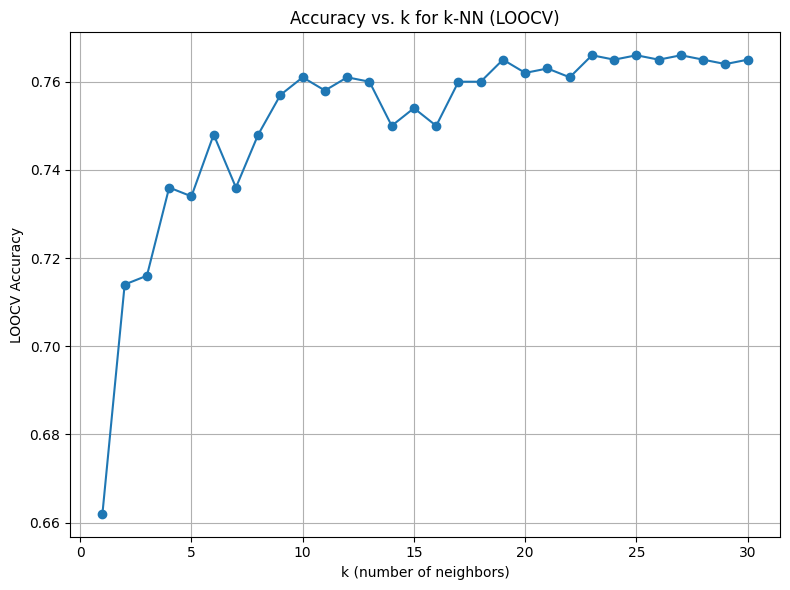

In [91]:
### Plot the accuracies vs. the values for k

### Yor Code Goes Here 

# e D)
plt.figure(figsize=(8,6))
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("k (number of neighbors)")
plt.ylabel("LOOCV Accuracy")
plt.title("Accuracy vs. k for k-NN (LOOCV)")
plt.grid(True)
plt.tight_layout()

3 E) You can notice that with small k the accuracy is lower compared to large k and there is more variety in accuracy when the k is smaller. At around k = 20 you can see the line flatten quite a lot, especially after k = 23 (which was the best k we got earlier). After 23 the accuracy barely changes.

# What if the number of <i>k</i> still increases? Experiment with the <i>k</i> values of $201-230$

- **Exercise 3 F)** Plot accuracies against <i>k</i>.
- **Exercise 3 G)** Observe the line trend

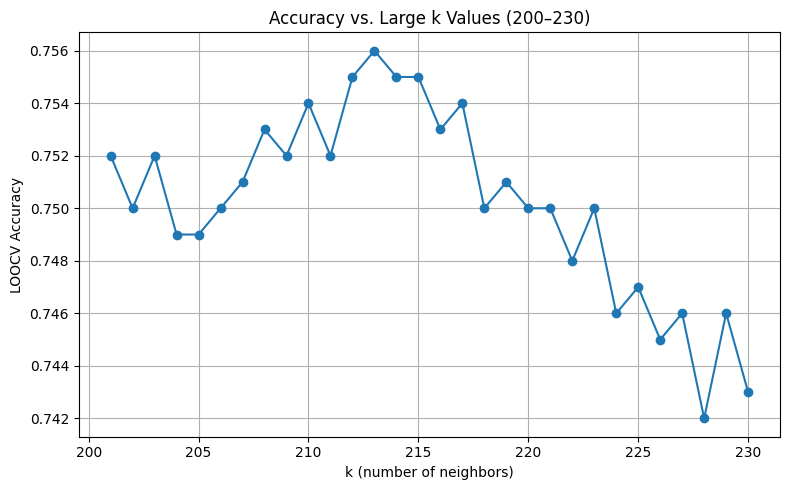

In [92]:
# If the number of k still increases?
# ----- Let's try really large k values (200-251) and see what happens to the final accuracy

### Yor Code Goes Here 

# New range of k values
k_range = list(range(201, 231))

# Run LOOCV for each k
accuracies_large = []

for k in k_range:
    knn_large = KNeighborsClassifier(n_neighbors=k)
    scores_large = cross_val_score(knn_large, features, labels, cv=LeaveOneOut(), n_jobs=-1)
    accuracies_large.append(scores_large.mean())

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_range, accuracies_large, marker="o")
plt.xlabel("k (number of neighbors)")
plt.ylabel("LOOCV Accuracy")
plt.title("Accuracy vs. Large k Values (200–230)")
plt.grid(True)
plt.tight_layout()

3 G) All the accuracy values are between 0.7375 to 0.7550 which is a very small range. On a bigger scale plot this line would pretty much be a flat line. This matches the thoughts i wrote down for 3 B) and C). 


______________
## <font color = lightcoral>4.  Data Loading and Initial Exploration for (Prostate Cancer) dataset </font>


We begin by introducing the <font color = lightcoral>prostate cancer dataset</font>, which will be used for our regression task. Our primary goal is to *predict the level of prostate-specific antigen (PSA)*, represented by the `lpsa` variable, using other relevant features as predictors.

Here's a brief overview of the features in our dataset:

| Feature | Type | Explanation |
| :- | :- | :-
| lcavol | numeric | log cancer volume
| lweight | numeric | log prostate weight
| age | numeric | patient's age
| lbph | numeric | log of benign prostatic hyperplasia amount
| svi | boolean | seminal vesicle invasion (0=no, 1=yes)
| lcp | numeric | log of capsular penetration
| gleason | numeric | Gleason score
| pgg45 | numeric | percentage of Gleason score 4+5
| lpsa | numeric | log PSA level (target variable)

Ensure that the `prostate.csv` file is located in the correct path (as specified in the code) for the code to execute correctly.

**Exercise 4 A)**

Load the prostate dataset and display summary statistics (mean, std, min, max) for all numeric variables.
 



In [93]:
#  Load prostate data
cancerData = pd.read_csv("prostate.csv")

#  Display the first 5 rows of cancerData
# display(...)
display(cancerData.head())

#  Display the number of unique values per column
# display(...)
display(cancerData.nunique())

#  Display summary statistics of the dataset
# display(...)
display(cancerData.describe())

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


lcavol     93
lweight    88
age        31
lbph       42
svi         2
lcp        30
gleason     4
pgg45      19
lpsa       85
dtype: int64

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


----------

**Exercise 4 B)**
 
Plot pairwise relationships between the `lpsa` variable and all other features using `seaborn.pairplot` with the following parameters: `kind="reg"`, `diag_kind="kde"`, and `plot_kws={"line_kws": {"color": "red"}}`. You should **not** include the 'svi' variable in the analysis since it has only two values (0 or 1) and is binary.
 
 

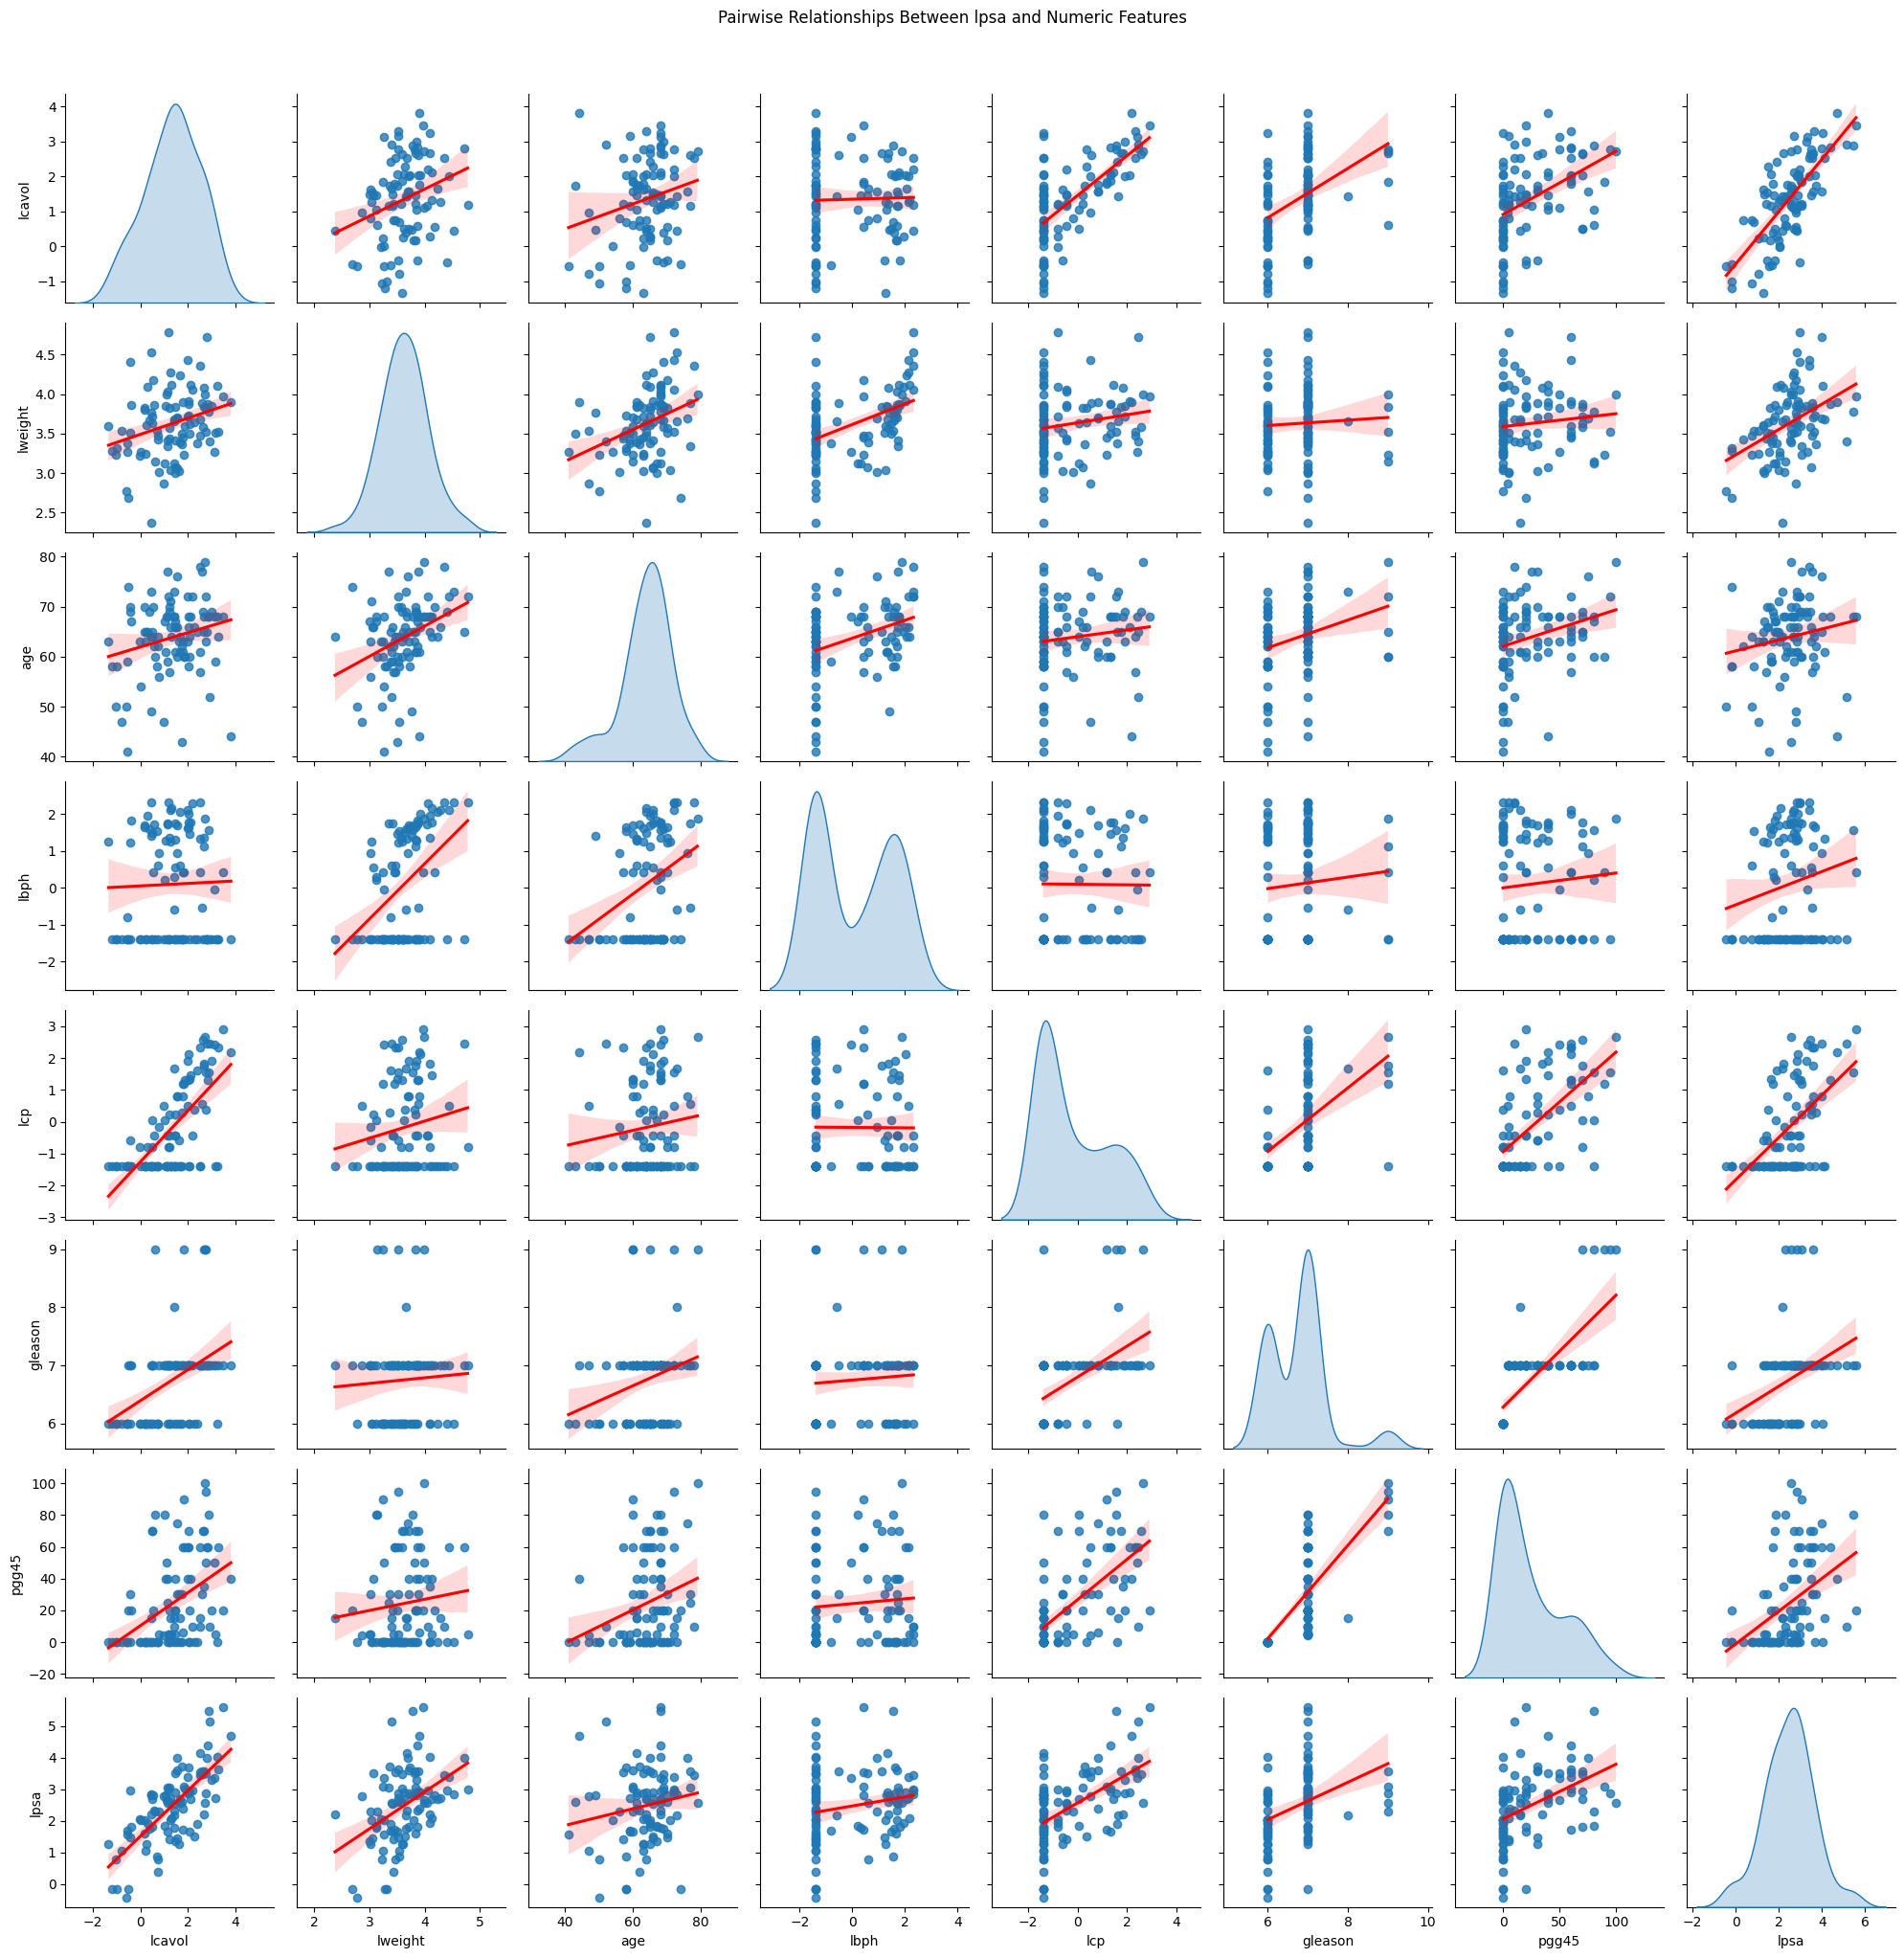

In [94]:
#  Import necessary packages
# import ...

#  Select numeric columns from cancerData
# numeric_features = ...
numeric_features = cancerData.select_dtypes(include=["number"]).columns.tolist()

#  Remove 'lpsa' and 'svi' from the feature list
# features_for_pairplot = ...

# I didn't remove lpsa because we need the variable for the relationships?
features_for_pairplot = [col for col in numeric_features if col != "svi"]

#  Create the pairplot
sns.pairplot(
    cancerData[features_for_pairplot],
    kind="reg",
    diag_kind="kde",
    plot_kws={"line_kws": {"color": "red"}}
)

#  Add a title to the figure
plt.suptitle("Pairwise Relationships Between lpsa and Numeric Features", y=1.02)

plt.tight_layout()

______________
## <font color = royalblue> 5. Ridge Regression </font>


Having explored the relationships within our data, we are now ready to delve into regression modeling. This section will focus on <font color = royalblue>Ridge Regression</font>, a powerful regularization technique for predicting continuous outcomes. Our objective is to build a Ridge Regression model that can accurately estimate `lpsa` levels based on the other features in the dataset.

Before we train our model, it's crucial to prepare the data appropriately. This involves splitting the dataset into training and testing sets, and standardizing features to ensure optimal model performance, especially for regularization techniques like Ridge Regression.

**Exercise 5 A)**

1. Separate the features (X) from the target variable (`lpsa`).
2. Split the data into training (80%) and testing (20%) sets using `train_test_split(X, y, test_size=0.2, random_state=2025, shuffle=True)`. Set a `random_state` for reproducibility.
3. Standardize the features for both the training and testing sets using `StandardScaler()`.





In [95]:

#  Import necessary packages
# from ...

#  Separate X and y
X = cancerData.drop(columns=["lpsa", "svi"])  
y = cancerData["lpsa"]

#  Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2025, shuffle=True
)

#  Standardize features
# scaler = ...
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Print results
print("Shape of training features:", X_train_scaled.shape)
print("Shape of testing features:", X_test_scaled.shape)
print("First 5 rows of standardized training features:\n", X_train_scaled[:5])

Shape of training features: (77, 7)
Shape of testing features: (20, 7)
First 5 rows of standardized training features:
 [[ 0.08124324 -0.45150381  0.26523809  1.13849976 -0.21744056  0.2420277
  -0.25413626]
 [ 1.17651071  0.95437337  2.05917947  1.23063757  2.02836461  2.90433236
   2.4684365 ]
 [ 1.63398152  1.20959348  0.54122907 -1.07926497 -0.91245751 -1.08912463
  -0.93477944]
 [-0.77728149  0.29265624  0.1272426  -1.07926497 -0.48491507  0.2420277
   1.44747172]
 [-1.74105915 -1.98715523 -1.94268977 -1.07926497 -0.91245751 -1.08912463
  -0.93477944]]


----------

**Exercise 5 B)**

Train a Ridge Regression model (with `Ridge(alpha=100, random_state=2025)`) using the scaled training data. Evaluate the model on both the training and testing sets using Mean Squared Error (MSE). 

Look at the Test MSE and compare it with Training MSE what do you notice? is the model generalize well, and do you think that alpha=100 is too strong? 


In [96]:
#  Create Ridge model with alpha=100
ridge = Ridge(alpha=100, random_state=2025)

#  Fit the model
# ridge.fit(...)
ridge.fit(X_train_scaled, y_train)

#  Predict on training and test data
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

#  Print evaluation results
print("Training MSE:", mse_train)
print("Test MSE:", mse_test)

Training MSE: 0.6369667653161165
Test MSE: 0.8019296960675915


5 B) The gap between the test and training MSE is quite big, which suggests that the model is not generalizing that well. The both values are also pretty high, which suggests that the model might be underfitting. In that case alpha = 100 is likely too strong. 


____________
## <font color = forestgreen> 6. Hyperparameter Tuning with Cross-Validation </font>



selecting the optimal hyperparameters is crucial for maximizing ML model performance. This is where <font color = forestgreen>hyperparameter tuning</font> comes into play, often coupled with <font color = forestgreen>cross-validation</font> to ensure robust and reliable model selection.

Cross-validation helps us estimate how well a model will perform on unseen data, providing a more stable evaluation than a single train–test split—especially when fine-tuning hyperparameters. In this section, we will use K-Fold cross-validation to identify the best `alpha` (regularization strength) for our Ridge Regression model.

Before tuning hyperparameters, it is important to remember the purpose of the data split:

* **Training set:** used to fit (train) the model.
* **Validation (via cross-validation):** used to evaluate model performance during tuning **without** touching the test set.
* **Test set:** used only once at the very end to estimate final model performance **after** all tuning decisions are complete.

Using the test set during hyperparameter tuning would lead to overly optimistic results.
Therefore, we rely on K-Fold cross-validation applied to the training data to select hyperparameters in a robust and unbiased way.

---

**Exercise 6 A)**

Perform K-Fold cross-validation (e.g., with 5 folds) to find the optimal `alpha` value for Ridge Regression from a predefined range of `alphas` (e.g., `np.logspace(-2, 10, num=13)`). Plot the training MSE and cross-validation MSE against the `alpha` values. Highlight the `alpha` value that yields the lowest cross-validation MSE.
Use a logarithmic x-axis (plt.xscale('log')) for the alpha values.

* What is the optimal `alpha` value found, and how does it compare to `alpha=100` used in the previous question?

 
---

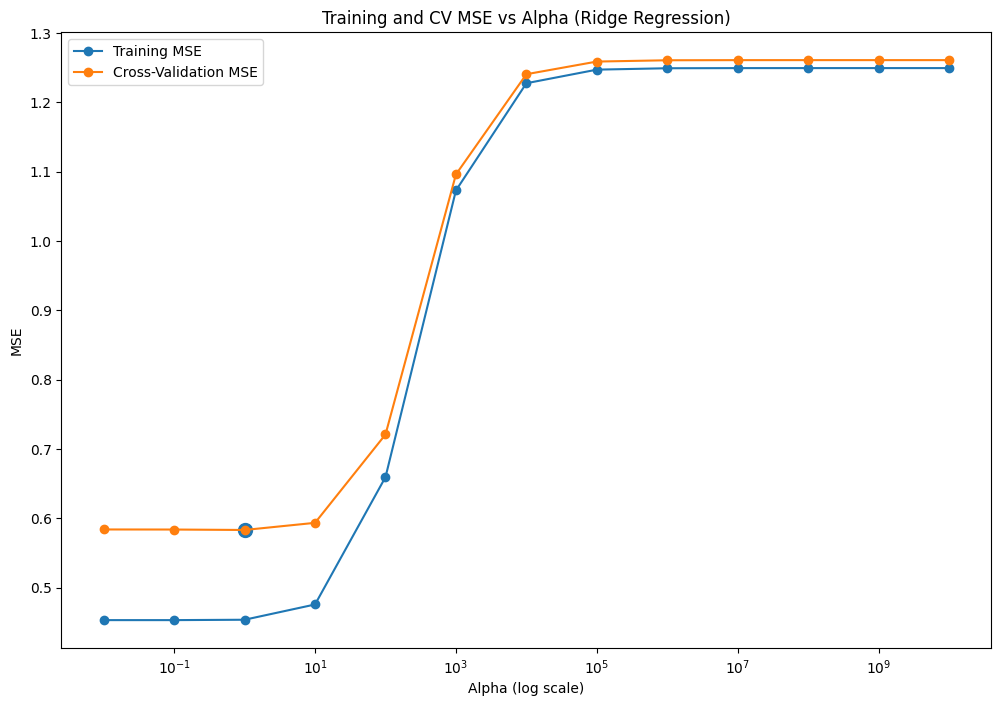

In [97]:

#  Define alphas
# alphas = ...
alphas = np.logspace(-2, 10, num=13)

#  Create lists to store MSE values
# train_mse = ...
# cv_mse = ...
train_mse = []
cv_mse = []

#  Create KFold object
# kf = ...
kf = KFold(n_splits=5, shuffle=True, random_state=2025)

#  Loop over each alpha and compute train MSE and CV MSE
# for alpha in alphas:
#     ...
for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=2025)
    
    fold_train_mse = []
    fold_val_mse = []

    # Cross-validation loop
    for train_index, val_index in kf.split(X_train_scaled):
        X_tr, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
        
        ridge.fit(X_tr, y_tr)
        
        # Predict on train and validation splits
        y_tr_pred = ridge.predict(X_tr)
        y_val_pred = ridge.predict(X_val)
        
        fold_train_mse.append(mean_squared_error(y_tr, y_tr_pred))
        fold_val_mse.append(mean_squared_error(y_val, y_val_pred))
    
    # Store average MSE across folds
    train_mse.append(np.mean(fold_train_mse))
    cv_mse.append(np.mean(fold_val_mse))


#  Plot training and CV MSE vs alpha
# plt.figure(...)
# ...
plt.figure(figsize=(12, 8))
plt.plot(alphas, train_mse, label="Training MSE", marker="o")
plt.plot(alphas, cv_mse, label="Cross-Validation MSE", marker="o")
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("MSE")
plt.title("Training and CV MSE vs Alpha (Ridge Regression)")
plt.legend()

#  Identify and mark the best alpha
# best_index = ...
# best_alpha = ...
# ...
best_index = np.argmin(cv_mse)
best_alpha = alphas[best_index]

plt.scatter(best_alpha, cv_mse[best_index], s=100)
plt.show()

# plt.show()


The plot suggests the optimal alpha value to be one. The alpha = 100 used in the previous question is much larger than the value we got from this exercise. This also backs up the fact that the model in previous question was probably underfitting.

----------

**Exercise 6 B)**

Train the Ridge Regression model again using the optimal `alpha` value found in Exercise 6 A). Print the Mean Squared Error (MSE) for both the training and test sets, and compare the results with the previous model you trained with `alpha=100` in Exercise 5 B).




In [98]:
#  Create Ridge model using best_alpha
# ridge = ...
ridge = Ridge(alpha=1, random_state=2025)

#  Fit model to the training data
# ridge.fit(...)
ridge.fit(X_train_scaled, y_train)

#  Predict on training and test sets
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

mse_train_best = mean_squared_error(y_train, y_train_pred)
mse_test_best = mean_squared_error(y_test, y_test_pred)

#  Print evaluation results and compare between models trained with best_alpha and alpha=100
print("Training MSE (alpha=1):", mse_train_best)
print("Test MSE (alpha=1):", mse_test_best)
 

Training MSE (alpha=1): 0.46494246521797195
Test MSE (alpha=1): 0.6840422097201059


The new values are clearly much lower than the 5 B) results. This means with alpha = 1 the model fits the data better and generalizes better. The model also reduces the underfitting that happened with alpha = 100.


_____________________

## <font color = darkorange> 7. Bonus Exercise </font>


You can stop here and get the "pass" grade! To get the pass with honors, you need to do the following exercise. This means you'll get one bonus point for the exam.

The exercise may require you to do some research of your own. You are also required to **explain** the steps you choose with your own words, and show that you tried to understand the idea behind the task. There's no single correct solution for this so just explain what you did and especially ***why*** you did it. Please note that submitting only code will not be awarded a pass with honors.

----------------

**Exercise 7 A)**

Using the Ridge Regression model with the optimal `alpha` found in Exercise 6 A, write out the complete regression equation, including the intercept and the coefficients for each feature.

- What does the intercept term represent in this model?
- Which feature has the largest coefficient? What does this tell you about its importance? you can plot the features importance based on the coefficients and Sort by absolute coefficient value for better visualization 

Which of the following statements best describes the role of a positive coefficient for `lcavol` in the Ridge Regression model predicting `lpsa`?

A) An increase in `lcavol` is associated with a decrease in predicted `lpsa`.
B) `lcavol` has no influence on predicted `lpsa`.
C) An increase in `lcavol` is associated with an increase in predicted `lpsa`.
D) The model is not well-fitted if `lcavol` has a positive coefficient.
 


In [ ]:
### Code - Ridge Regression Equation

# Re-fit the best Ridge model using the optimal alpha found in Exercise 3 A

# Let's write the equation


In [ ]:
### Code - Visualize Coefficients

# Create a DataFrame for easier plotting

# Sort by absolute coefficient value for better visualization

# Create horizontal bar plot



----------

**Exercise 7 B) - Regularization Path Analysis**

Visualize how coefficients change as the regularization strength (alpha) varies. This is called a regularization path or coefficient path.

1. Train Ridge Regression models for a range of alpha values (e.g., `np.logspace(-2, 4, num=50)`)
2. For each alpha, extract the coefficients
3. Plot the coefficient paths: each feature's coefficient value vs. log(alpha)
4. Add a vertical line at the optimal alpha found.

- Which of the following best describes what happens to Ridge Regression coefficients as alpha approaches infinity?

    A) All coefficients approach infinity
    B) All coefficients approach zero
    C) Coefficients remain unchanged
    D) Coefficients become random

- If a feature's coefficient changes dramatically as alpha increases, what does this suggest about that feature?

    A) The feature is not important
    B) The feature may be contributing to overfitting
    C) The feature has no correlation with the target
    D) The feature should be removed

 


In [ ]:
### Code - Regularization Path Analysis

# Define a range of alpha values

# Plot coefficient paths

# Add vertical line at optimal alpha


----------

**Exercise 7 C) - Comparison with Lasso Regression**

This exercise focuses on comparing **Ridge Regression ($\text{L}_2$ regularization)** and **Lasso Regression ($\text{L}_1$ regularization)** to understand the practical differences between the two regularization techniques.

---
Coding Tasks:

1.  **Import:** Import the `Lasso` class from `sklearn.linear_model`.
2.  **Lasso Training (Fixed Alpha):** Train a Lasso model using the previously defined training test split in 5A) `X_train_scaled` and `y_train` with a fixed regularization parameter, $\alpha = 0.1$.
3.  **Coefficient Comparison (Fixed Alpha):** Compare the coefficients of the previously optimized Ridge Model (using its best $\alpha$) with the coefficients of the **Lasso Model** trained with $\alpha=0.1$.
4.  **Coefficient Visualization (Fixed Alpha):** Create a visualization (e.g., a bar chart) to display the coefficients of both models side-by-side.
5.  **Performance Comparison (Fixed Alpha):** Compare the test set performance metrics (Mean Squared Error (MSE) and **$\text{R}^2$**) for both models on `X_test_scaled` and `y_test`
6.  **Optimal Alpha Search (Lasso):** Perform hyperparameter tuning for Lasso Regression (similar to the method used for Ridge Regression, e.g., using cross-validation on the range `alphas_lasso = np.logspace(-4, 1, num=20)`) to find the optimal $\alpha$ value.
7.  **Final Coefficient Visualization (Optimal Alpha):** Train the Lasso model using its best $\alpha$ and visualize its final coefficients side-by-side with the pervious ridge regression model that trained with its best $\alpha$.

---

Answer the following questions based on your results:

* What effect did training with Lasso $\alpha=0.1$ have on the model's coefficients? Were any coefficients driven to exactly zero? If so, which features did this affect?
* Was the Lasso Test MSE (with $\alpha=0.1$) better or worse than the Ridge Test MSE(with its best $\alpha$)?
* What was the best alpha value for Lasso Regression determined through cross-validation?
* After training both the Ridge and Lasso models with their respective optimal $\alpha$ values, is there any significant difference in the resulting coefficient values?

 


In [ ]:
### Code - Comparison with Lasso Regression

from sklearn.linear_model import Lasso

# Find optimal alpha for Lasso using cross-validation

# Train final models for ridge and lasso with the best alpha values
 
# Compare coefficients
 
# Visualize coefficients side-by-side
  
# Compare test set performance
